In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

Read the dataframe with all the projects's abstract, the framework programme, and the top topic that was assigned to each document from the LDA model

In [2]:
df = pd.read_pickle('dfs/df_topics')
df.head(2)

,merged,framework_programme,top_prob_topic,top_topic
0,"[spot, tation]",FP4,0.367796,3
1,"[formation, occurrence, nitrous, acd, atmosphe...",FP4,0.561012,5


In [3]:
df.columns

Index([u'merged', u'framework_programme', u'top_prob_topic', u'top_topic'], dtype='object')

In [4]:
df.shape

(76522, 4)

In [5]:
vc = df.top_topic.value_counts()
plt.bar(vc.index, vc)
_ = plt.ylabel('Topic count')

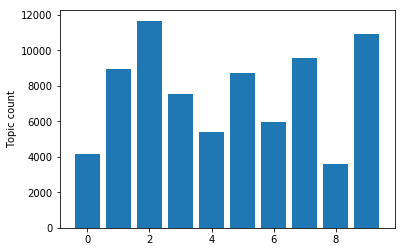

In [6]:
plt.show()

Create a dataframe, which contains the 10 topics, the framework-programme and the number of times each topic occurs during a framework programme ('count')

In [7]:
sz = df.groupby(["top_topic", 'framework_programme']).size()
sz = sz.reset_index()
sz = sz.rename(columns = {0:'count'})

In [8]:
sz.shape

(50, 3)

In [9]:
sz.columns

Index([u'top_topic', u'framework_programme', u'count'], dtype='object')

Normalize the 'count' column (divided by the No of docs per framework)

In [10]:
sz['normalized'] = np.where(sz['framework_programme']=='FP4', 
                    (sz['count']/sz.loc[sz['framework_programme'] == 'FP4', 'count'].sum())*100, sz['count'])
sz['normalized'] = np.where(sz['framework_programme']=='FP5', 
                    (sz['count']/sz.loc[sz['framework_programme'] == 'FP5', 'count'].sum())*100, sz['normalized'])
sz['normalized'] = np.where(sz['framework_programme']=='FP6', 
                    (sz['count']/sz.loc[sz['framework_programme'] == 'FP6', 'count'].sum())*100, sz['normalized'])
sz['normalized'] = np.where(sz['framework_programme']=='FP7', 
                    (sz['count']/sz.loc[sz['framework_programme'] == 'FP7', 'count'].sum())*100, sz['normalized'])
sz['normalized'] = np.where(sz['framework_programme']=='H2020', 
                    (sz['count']/sz.loc[sz['framework_programme'] == 'H2020', 'count'].sum())*100, sz['normalized'])

In [12]:
top_year = sz.pivot(index='framework_programme', columns='top_topic', values='normalized')
top_year

top_topic,0,1,2,3,4,5,6,7,8,9
framework_programme,,,,,,,,,,
FP4,7.853367,9.473467,21.143681,8.526121,8.979200,9.782385,6.645157,12.439075,7.825908,7.331640
FP5,5.987676,11.748634,15.713289,9.522149,8.609464,8.807115,7.231717,11.742821,4.348332,16.288804
FP6,4.310772,12.357546,10.276484,10.197205,6.173818,12.119711,7.610742,11.336835,3.845010,21.771876
FP7,4.787753,12.699652,11.774124,10.477604,5.541454,14.019604,9.200609,13.562698,4.053579,13.882923
H2020,3.611264,11.562673,20.276091,10.215351,6.482606,10.911099,6.902264,12.114854,3.324130,14.599669


Plot the evolution of each topic over time (FP4-H2020)

In [13]:
trends = top_year.plot(figsize=(12, 8))

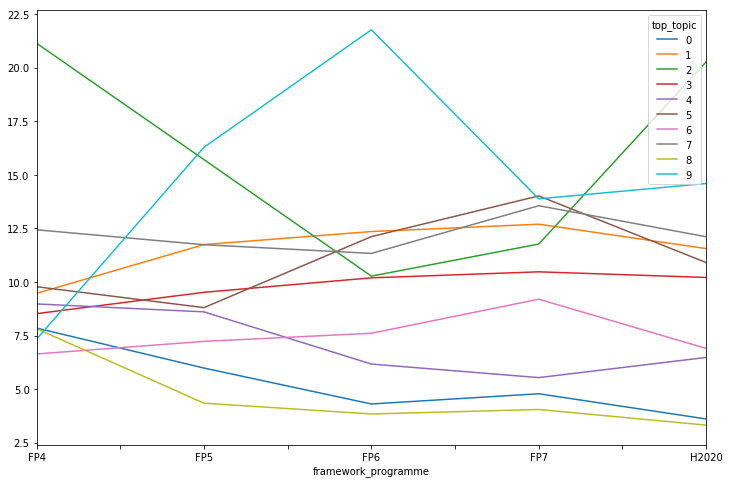

In [14]:
plt.show()